**머신러닝 - 의사결정트리**



---


Decision Tree란 ? 


*   '의사결정트리 또는 의사결정나무' 는 기계학습에서 지도학습의 알고리즘으로 분류(Classification) 또는 회귀(Regression)분석 목적으로 사용한다.
*   의사결정 규칙(Decision Rule)을 나무구조 표현을 통해 분류와 예측을 수행하는 분석 방법이다.
*   분류 또는 예측 과정이 나무 구조로 표현돼서 비교적 쉽게 이해할 수 있다.
*   목표 변수 유형에 따른 의사결정 트리
 - 범주형 목표 변수 : 분류 트리(Classification Tree), 목표 변수가 이산형인 경우, 각각의 범주에 속하는 빈도에 기초해 분리 발생 -> 분류 트리 구성
 - 연속형 목표 변수 : 회귀 트리(Regression Tree, 목표 변수가 연속형인 경우, 평균과 표준 편차에 기초해 분리 발생 -> 회귀 트리 구성 







기상 데이터를 분석해 테니스 play 여부를 예측



In [21]:
# 사용한 라이브러리
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus
import os

In [22]:
tennis_data = pd.read_csv('playtennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [23]:
#문자열 항목을 숫자값으로 바꾸기
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)
tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 1)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 2)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 3)
tennis_data.Humidity = tennis_data.Humidity.replace('High', 1)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 2)
tennis_data.Wind = tennis_data.Wind.replace('Weak', 1)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 2)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 1)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 2)
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,1
1,0,1,1,2,1
2,1,1,1,1,2
3,2,2,1,1,2
4,2,3,2,1,2
5,2,3,2,2,1
6,1,3,2,2,2
7,0,2,1,1,1
8,0,3,2,1,2
9,2,2,2,1,2


In [24]:
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

In [27]:
dt_prediction = dt_clf.predict(X_test)

In [34]:
#accuracy_score를 이용한 정확도 계산
accuracy = accuracy_score(y_test, dt_prediction)
print("정확도:", accuracy)

정확도: 0.75


In [29]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]

In [30]:
target_name = np.array(['Play No', 'Play Yes'])

**의사결정트리 모델 시각화**

In [31]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [32]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

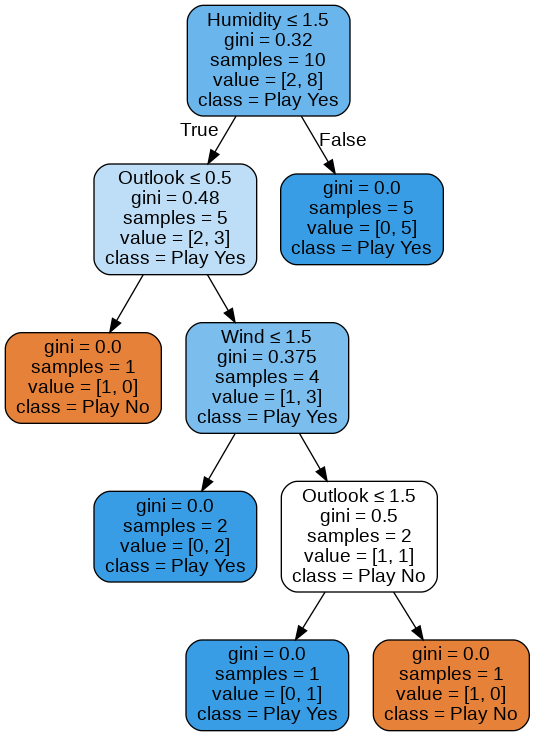

In [33]:
Image(dt_graph.create_png())